##### This script covers the main steps in the data exploration process using Python. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = pd.read_csv('rt_test.csv')

In [3]:
data.head(5)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows/columns with missing values
data.dropna(inplace=True)  # Remove rows with missing values

# Remove duplicates
data.drop_duplicates(inplace=True)


id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64


In [5]:
# Display basic statistics
print(data.describe())

# Display data types
print(data.dtypes)


           id.orig_p      id.resp_p  flow_duration   fwd_pkts_tot  \
count  117922.000000  117922.000000  117922.000000  117922.000000   
mean    34949.094317    1050.812266       3.808474       2.290209   
std     18966.047699    5364.536754     127.064242      22.111453   
min         0.000000       0.000000       0.000000       0.000000   
25%     18352.250000      21.000000       0.000001       1.000000   
50%     37534.000000      21.000000       0.000004       1.000000   
75%     51036.000000      21.000000       0.000005       1.000000   
max     65535.000000   65389.000000   21728.335580    4345.000000   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
count  117922.000000      117922.000000      117922.000000      1.179220e+05   
mean        1.942776           1.470506           0.847594      3.510607e+05   
std        33.727670          19.286029          32.989078      3.707032e+05   
min         0.000000           0.000000           0.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117922 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 117922 non-null  int64  
 1   id.resp_p                 117922 non-null  int64  
 2   proto                     117922 non-null  object 
 3   service                   117922 non-null  object 
 4   flow_duration             117922 non-null  float64
 5   fwd_pkts_tot              117922 non-null  int64  
 6   bwd_pkts_tot              117922 non-null  int64  
 7   fwd_data_pkts_tot         117922 non-null  int64  
 8   bwd_data_pkts_tot         117922 non-null  int64  
 9   fwd_pkts_per_sec          117922 non-null  float64
 10  bwd_pkts_per_sec          117922 non-null  float64
 11  flow_pkts_per_sec         117922 non-null  float64
 12  down_up_ratio             117922 non-null  float64
 13  fwd_header_size_tot       117922 non-null  i

In [7]:
    #convert all the values in the columns into numeric
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')

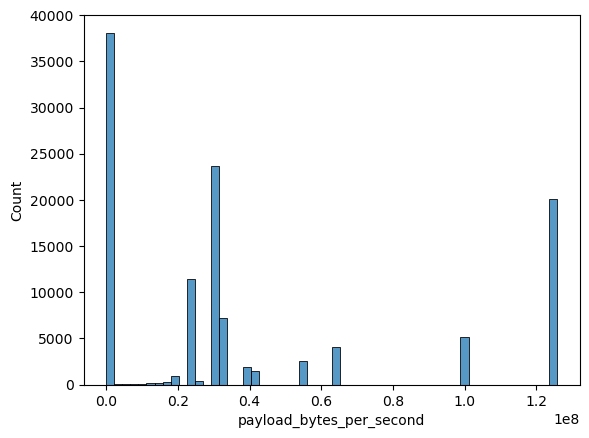

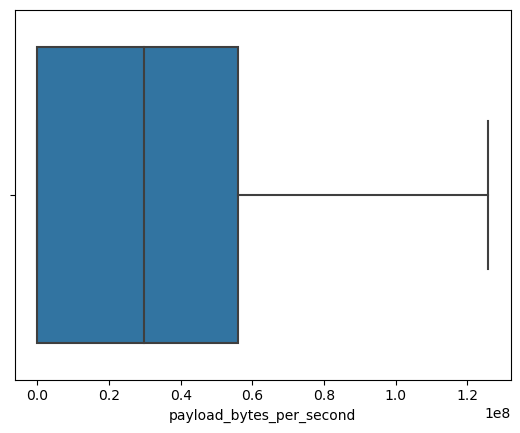

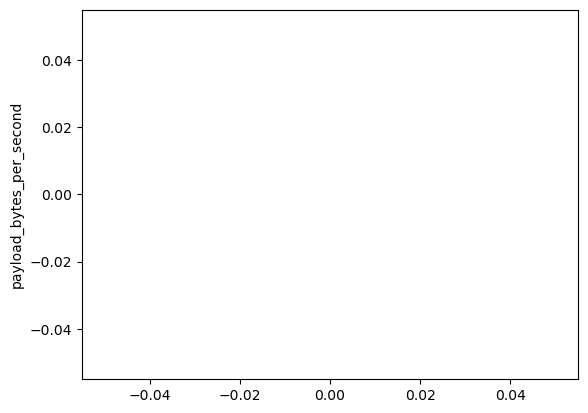

In [8]:

# Histogram of a specific column
sns.histplot(data['payload_bytes_per_second'])
plt.show()

# Box plot for another column
sns.boxplot(x=data['payload_bytes_per_second'])
plt.show()

# Scatter plot to explore relationship between two numerical variables
sns.scatterplot(x='service', y='payload_bytes_per_second', data=data)
plt.show()


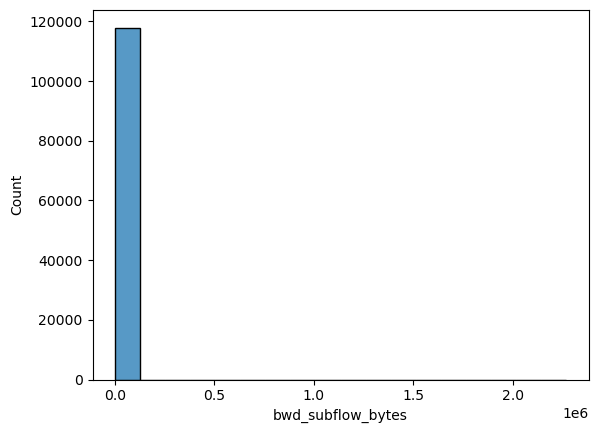

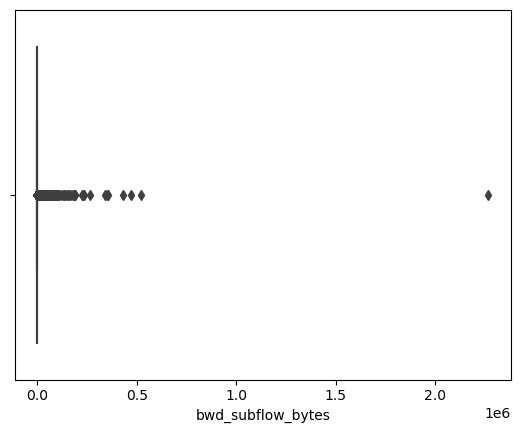

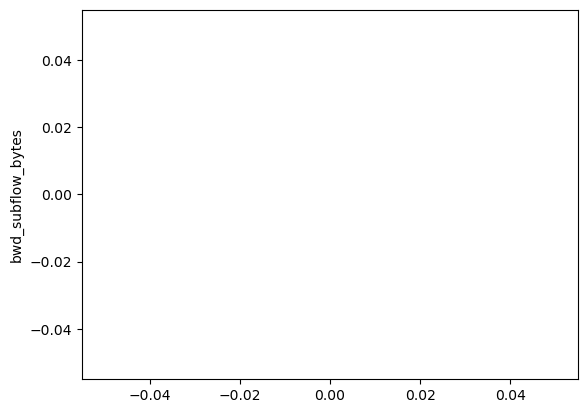

In [9]:
# Histogram of a specific column
sns.histplot(data['bwd_subflow_bytes'])
plt.show()

# Box plot for another column
sns.boxplot(x=data['bwd_subflow_bytes'])
plt.show()

# Scatter plot to explore relationship between two numerical variables
sns.scatterplot(x='service', y='bwd_subflow_bytes', data=data)
plt.show()

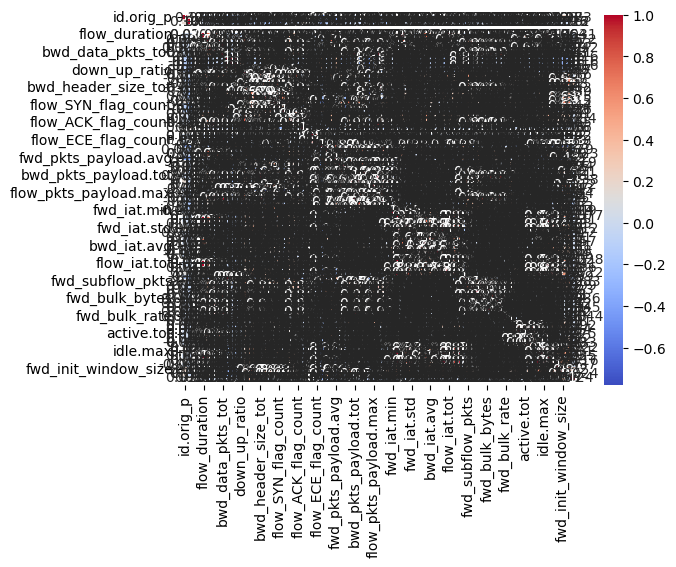

In [10]:
# Correlation matrix
correlation_matrix = data.corr()
# print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [32]:
# More detailed correlation analysis
strong_correlations = correlation_matrix[correlation_matrix.abs() > 0.8]
print(strong_correlations)


                      id.orig_p  id.resp_p  proto  service  flow_duration  \
id.orig_p                   1.0        NaN    NaN      NaN            NaN   
id.resp_p                   NaN        1.0    NaN      NaN            NaN   
proto                       NaN        NaN    NaN      NaN            NaN   
service                     NaN        NaN    NaN      NaN            NaN   
flow_duration               NaN        NaN    NaN      NaN            1.0   
...                         ...        ...    ...      ...            ...   
idle.std                    NaN        NaN    NaN      NaN            NaN   
fwd_init_window_size        NaN        NaN    NaN      NaN            NaN   
bwd_init_window_size        NaN        NaN    NaN      NaN            NaN   
fwd_last_window_size        NaN        NaN    NaN      NaN            NaN   
Attack_type                 NaN        NaN    NaN      NaN            NaN   

                      fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  \
id.o

In [33]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(data.select_dtypes(include=[np.number]))
print(reduced_data.shape)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Scatter plot
sns.pairplot(data, kind='scatter')
plt.title('Scatter Plot')
plt.show()